<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments--Spring-2019/blob/master/Assignment1/Problem4/Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing the required libraries

from keras.datasets import mnist
import numpy as np
from keras import models
from keras import layers
from keras.utils import to_categorical 

Using TensorFlow backend.


In [6]:
#loading the MNIST dataset

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()  

print('Training Data Shape',train_images.shape)
print('Test Data Shape',test_images.shape)
print('The train and test labels look like this,' ,train_labels.shape,test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training Data Shape (60000, 28, 28)
Test Data Shape (10000, 28, 28)
The train and test labels look like this, (60000,) (10000,)


In [7]:
classes = np.unique(train_labels)
number_of_Classes = len(classes)
print('Total number of Classes : ', number_of_Classes)
print('Classes are : ', classes)

Total number of Classes :  10
Classes are :  [0 1 2 3 4 5 6 7 8 9]


In [8]:
#Defining the Single layered Network

model=models.Sequential()
model.add(layers.Dense(28*28,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Preparing the Data for the network


train_images = train_images.reshape(60000, 28*28) 
test_images = test_images.reshape(10000, 28*28) 
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 
train_images /= 255 
test_images /= 255


train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [10]:
#Compiling the network

epochs=20
batch_size=128
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=epochs,batch_size=batch_size, validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 1.0617 - acc: 0.7784 - val_loss: 0.5798 - val_acc: 0.8710
Epoch 2/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.5098 - acc: 0.8755 - val_loss: 0.4220 - val_acc: 0.8953
Epoch 3/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.4131 - acc: 0.8923 - val_loss: 0.3657 - val_acc: 0.9042
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.3688 - acc: 0.9011 - val_loss: 0.3341 - val_acc: 0.9108
Epoch 5/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.3414 - acc: 0.9069 - val_loss: 0.3137 - val_acc: 0.9144
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.3219 - acc: 0.9114 - val_loss: 0.2982 - val_acc: 0.9192
Epoch 7/20
60000/60000 [==============================] - 7s 118us/step - 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred=model.predict(test_images) 
y_pred = [np.argmax(entry) for entry in y_pred]
y_true = [np.argmax(entry) for entry in test_labels]

print('Confusion Matrix\n\n')
print(confusion_matrix(y_true, y_pred))  

print(classification_report(y_pred,y_true))

Confusion Matrix


[[ 966    0    1    2    0    3    6    1    1    0]
 [   0 1112    2    2    1    1    4    2   11    0]
 [   8    1  958   14    9    1    8   10   20    3]
 [   0    1   15  953    0   11    2   12   12    4]
 [   1    1    3    1  932    0   12    2    5   25]
 [   9    2    1   30    5  808   12    4   15    6]
 [  10    3    2    1   10   10  918    1    3    0]
 [   2    8   23    6    5    1    0  960    2   21]
 [   7    3    6   16    7   10   11    9  899    6]
 [  11    7    1   12   26    5    1   13    4  929]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1014
           1       0.98      0.98      0.98      1138
           2       0.93      0.95      0.94      1012
           3       0.94      0.92      0.93      1037
           4       0.95      0.94      0.94       995
           5       0.91      0.95      0.93       850
           6       0.96      0.94      0.95       974
           7     

dict_keys(['val_loss', 'val_acc', 'loss', 'acc']) 





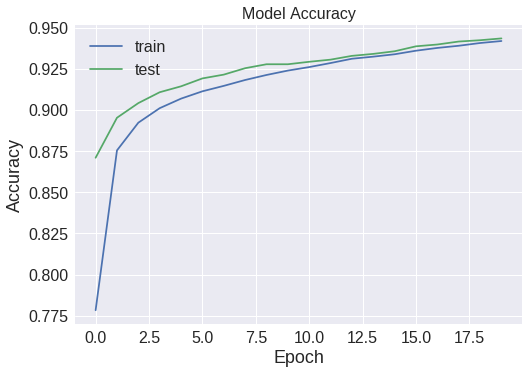

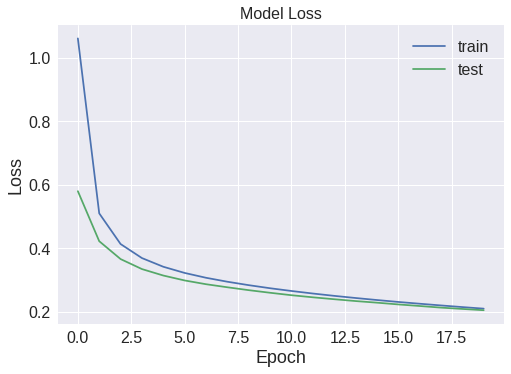

In [24]:

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys(),'\n\n\n')



SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n\n')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

